# Lekce 10: Nelineární funkce a zobrazení

Nejdříve načtěme nutné balíčky.

In [1]:
using Plots

# Příklady nelineárních funkcí

Pro ilustraci chceme vykreslit pár nelineárních funkcí na $x,y\in[-2,2]$. Specifikujme doménu.

In [2]:
xs = -2:0.01:2
ys = -2:0.01:2;

Použijme trik, který umožní funkci $f$ volat jak s dvěmi argumenty, tak s jejich vektorem.

In [3]:
f(xy) = f(xy[1], xy[2]);

Nyní již můžeme funkce vykreslovat. Nejdříve nadefinujeme nějakou funkci $f$. Poté vykreslíme její `surface` a `contourf` grafy. První kreslí graf, zatímco druhý vrstevnice. Vidíme, že některé funkce jsou spojité a některé diferencovatelné.

Kvadratická funkce $f(x,y)=x+y^2$:

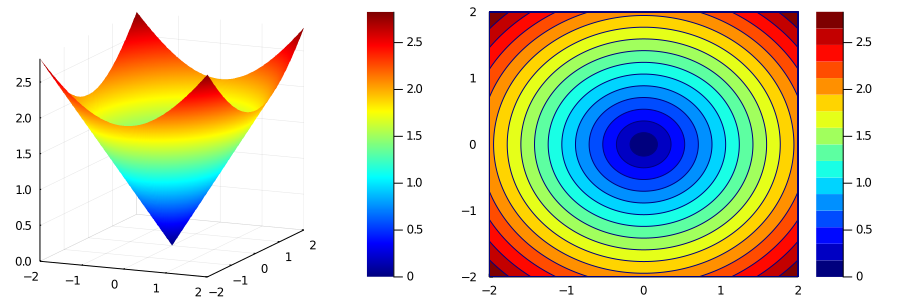

In [4]:
f(x,y) = sqrt(x^2+y^2)

plt1 = surface(xs, ys, f; color=:jet)
plt2 = contourf(xs, ys, f; color=:jet)
plot(plt1, plt2, size=(900,300))

$l_1$ norma $f(x,y)=|x|+|y|$:

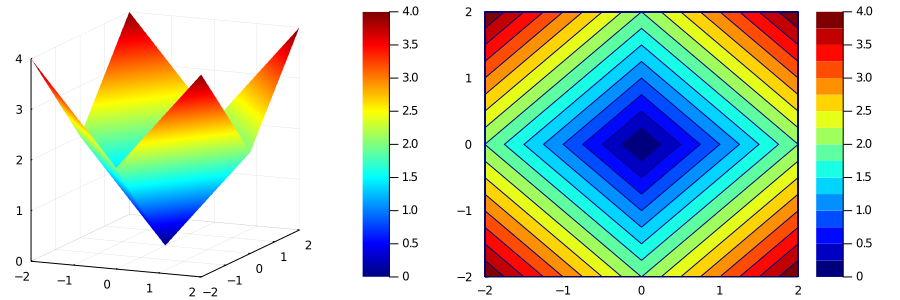

In [5]:
f(x,y) = abs(x)+abs(y)

plt1 = surface(xs, ys, f; color=:jet)
plt2 = contourf(xs, ys, f; color=:jet)
plot(plt1, plt2, size=(900,300))

$l_\infty$ norma $f(x,y)=\max\{|x|, |y|\}$:

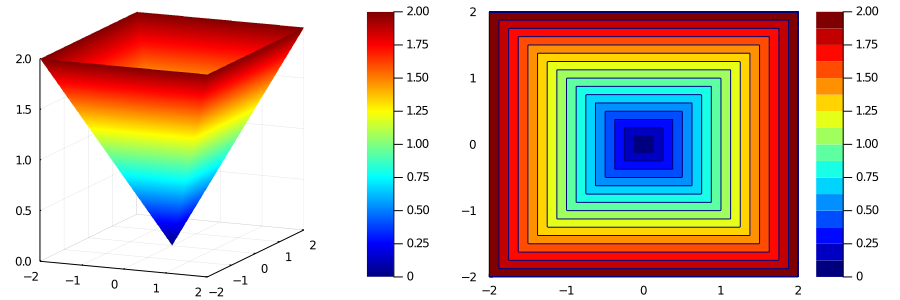

In [6]:
f(x,y) = max(abs(x), abs(y))

plt1 = surface(xs, ys, f; color=:jet)
plt2 = contourf(xs, ys, f; color=:jet)
plot(plt1, plt2, size=(900,300))

Maximum $f(x,y) = \max\{x,y\}$:

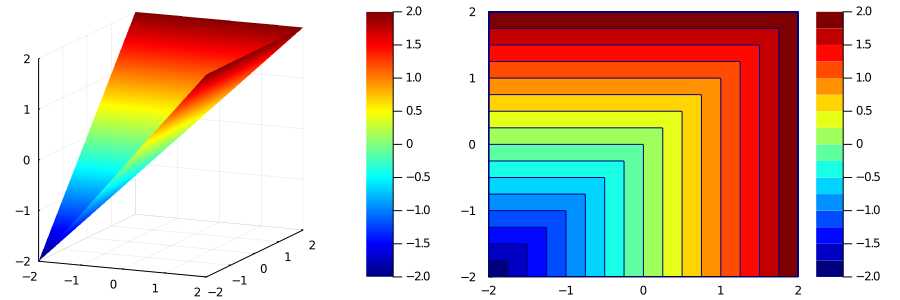

In [7]:
f(x,y) = max(x, y)

plt1 = surface(xs, ys, f; color=:jet)
plt2 = contourf(xs, ys, f; color=:jet)
plot(plt1, plt2, size=(900,300))

Charakteristická funkce $f(x,y) = \chi_{x\ge 0, y\ge 0}(x,y)$:

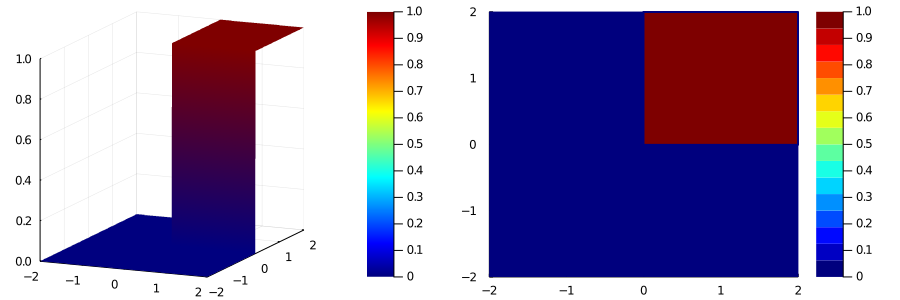

In [8]:
f(x,y) = Float64(x >= 0 && y >= 0)

plt1 = surface(xs, ys, f; color=:jet)
plt2 = contourf(xs, ys, f; color=:jet)
plot(plt1, plt2, size=(900,300))

# Derivace

Derivace je definována jako $$\lim_{\varepsilon\to 0} \frac{f(x+\varepsilon) - f(x)}{\varepsilon}.$$ Limita značí, že musíme brát $\varepsilon$ blízké nuly. Je to ale skutečně dobrý nápad? Zadefinujme si funkci `finite_difference`, která pro vstupy `f`, `x` a `ϵ` spočte tělo limity.

In [9]:
finite_difference(f, x, ϵ) = (f(x+ϵ) - f(x)) / ϵ;

Následně definujme funkci $f(x)=x^2$ a uvažujme $\varepsilon\in[10^{-15}, 1]$ s geometrickým rozdělením.

In [10]:
f(x) = x^2
ϵs = 10. .^(-15:0.1:0);

Vykresleme konečné diference v bodě $x=1$ pro všechny $\varepsilon$ definované výše. Pro $x$-ovou osu použijme logaritmickou škálu.

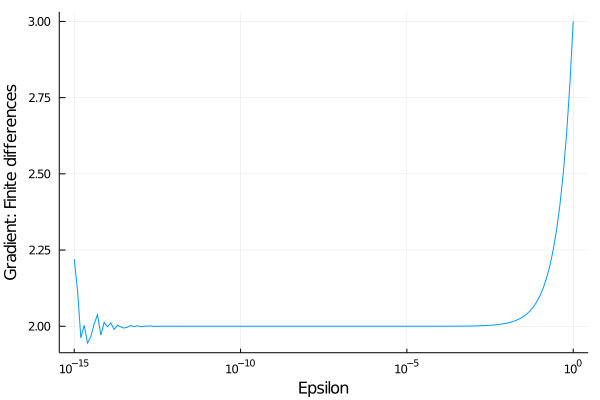

In [11]:
plot(ϵs, ϵ -> finite_difference(f, 1, ϵ); xscale=:log10, label="", xlabel="Epsilon", ylabel="Gradient: Finite differences")

Vidíme, že konečné diference dobře aproximují skutečnou hodnotu derivace $f'(1)=2$, pokud $\varepsilon$ není moc velké nebo moc malé. První je přirozené, protože z definice limity musí být $\varepsilon$ malé. Druhé z teoretického hlediska nedává smysl. Nepřesnost je ale způsobena tím, že počítače si čísla pamatují pouze ve formátu s konečným počtem bitů (zde například 64 bitů, do kterých je uvažováno i znaménko a mantisa). Když se odečítají dvě podobně velká čísla, způsobená chyba je velká. Přesně toto se stane pro malé $\varepsilon$.

# Taylorův polynom

Uvažujme funkci $f(x)=\sin(x)$ pro $x\in[-3,3]$. Víme, že derivace $f$ jsou $f'(x)=\cos(x)$, $f''(x)=-\sin(x)$, $f'''(x)=-\cos(x)$, $f''''(x)=\sin(x)$ a poté se opakují. Zadefinujme funkci `f1(x, k)`, která pro daný bod $x$ spočte $k$-tou derivaci $f^{(k)}(x)$ v tomto bodě.

In [12]:
xs = -3π:0.1:3π

function f1(x, k)
    if mod(k, 4) == 0
        return sin(x)
    elseif mod(k, 4) == 1
        return cos(x)
    elseif mod(k, 4) == 2
        return -sin(x)
    else
        return -cos(x)
    end
end;

Nyní si zadefinujme dvě pomocné funkce. Jsou trochu složitější, důležité je, že funkce `taylor` počítá hodnotu Taylorova rozvoje a funkce `taylor_anim` kreslí původní funkci a její Taylorovu aproximaci daného stupně.

In [13]:
taylor(f, x, x0, k) = sum((x-x0)^i * f(x0,i) / factorial(i) for i in 0:k)

function taylor_anim(f, xs, x0, file_name; ylim=(-2,2))
    anim = @animate for k in 1:19
        plot(xs, x -> f(x, 0), line=(5), label="True", ylims=ylim, legend=:topleft)
        plot!(xs, x -> taylor(f, x, x0, k), label="Taylor k = $(k)", ylims=ylim)
    end
    gif(anim, file_name; fps=2, show_msg=false)
end;

Vykresleme nyní onu Taylorovu aproximaci funkce $f(x)=\sin(x)$.

Plots.AnimatedGif("C:\\Users\\lukas\\Downloads\\___NEW\\Julia\\Optimalizace\\Code\\Taylor1.gif")
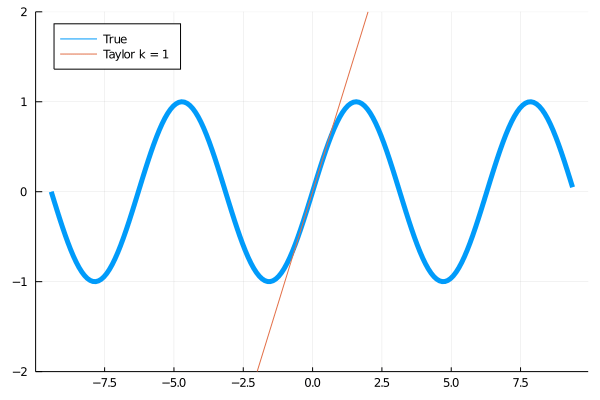

In [14]:
taylor_anim(f1, xs, 0, "Taylor1.gif")

Vidíme, že se zvyšujícím se stupněm aproximace se Taylorův polynom přibližuje původní funkci. Platí dokonce $f(x) = \sum_{i=0}^\infty \frac{f^{(i)}(x_0)}{i!}(x-x_0)^i$. Tyto funkce se nazývají algebraické.

Předefinujme nyní funkci $\sin(x)$ tak, že ji položíme rovnou nule mimo interval $[-\pi,\pi]$. Znovu vykresleme Taylorovu aproximaci.

Plots.AnimatedGif("C:\\Users\\lukas\\Downloads\\___NEW\\Julia\\Optimalizace\\Code\\Taylor2.gif")
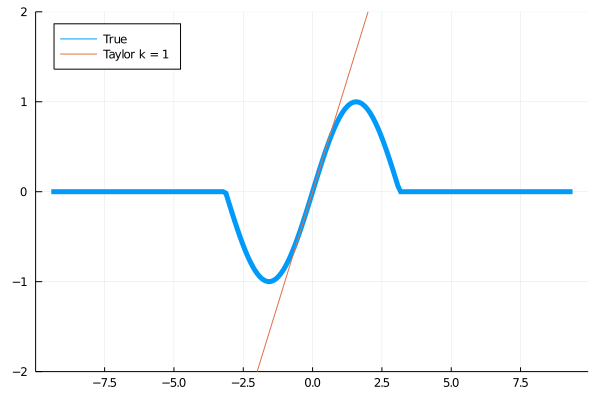

In [15]:
f2(x, k) = (x <= π && x >= -π) ? f1(x,k) : 0

taylor_anim(f2, xs, 0, "Taylor2.gif")

Vídíme, že ačkoli funkce je jiná než v předchozím případě, jejich Taylorovy aproximace jsou identické. Toto je způsobeno tím, že Taylorova aproximace uvažuje pouze hodnoty $f^{(k)}(x_0)$ kolem bodu $x_0=0$. Stejně jako derivace je Taylorův rozvoj pouze lokální a pokud nejsou splněny další podmínky, nemůže ho uvažovat daleko od referenčního bodu $x_0$.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*